
# Data Visualization with Matplotlib - Exercises 2

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## อ่านไฟล์ Superstore.csv

In [28]:
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

In [29]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


In [31]:
df1 = df.groupby('Year')['Profit'].sum()
a = df1.index
b = df1

Text(0.5, 1.0, 'Profit')

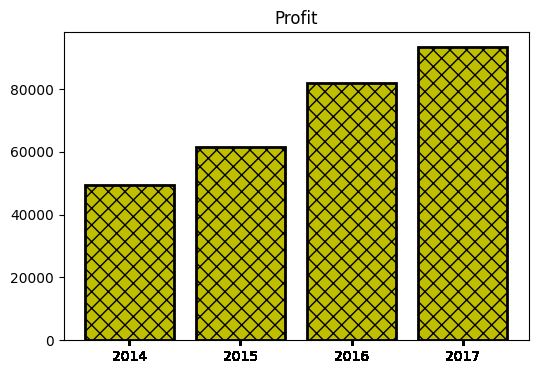

In [32]:
plt.figure(figsize = [6,4])
plt.bar(a, b,color = 'y',hatch = 'xx',lw = 2,ec = 'k')
plt.xticks(df['Year'])
plt.title('Profit')

## Exercise 2

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ในกราฟเดียวแยกตามหมวดหมู่ พร้อมตกแต่งให้สวยงาม

In [33]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']

In [34]:
x = arr_df['Furniture'].index
g = arr_df['Furniture']
y = arr_df['Office Supplies']
z = arr_df['Technology']

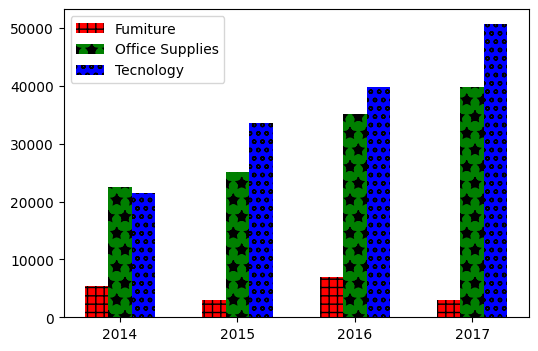

In [35]:
plt.figure(figsize = [6,4])
bw = 0.2
plt.bar(x, g, color = 'r', label = 'Fumiture',width = 0.2, hatch = '++')
plt.bar(x+0.2, y, color = 'g', label = 'Office Supplies',width = 0.2, hatch = 'o*')
plt.bar(x+0.2*2, z, color = 'b', label = 'Tecnology',width = 0.2, hatch = 'oo')
plt.xticks(x+bw,[2014, 2015, 2016, 2017])
plt.legend(loc = 'best')
plt.show()

## Exercise 3

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

In [36]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [37]:
dataShipMode =df.groupby('Order ID')['Ship Mode'].unique().value_counts()
dataShipModeLabel = ['Standard Class','Standard Class','Standard Class','Same Class']

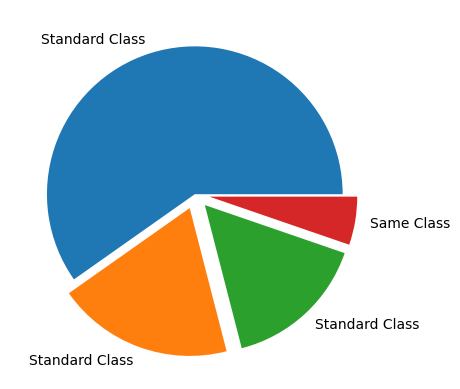

In [38]:
plt.pie(dataShipMode,labels=dataShipModeLabel,explode=[0,0.1,0.1,0.1])
plt.show()

## Exercise 4

จงวาดกราฟความถี่ แสดงจำนวนการขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

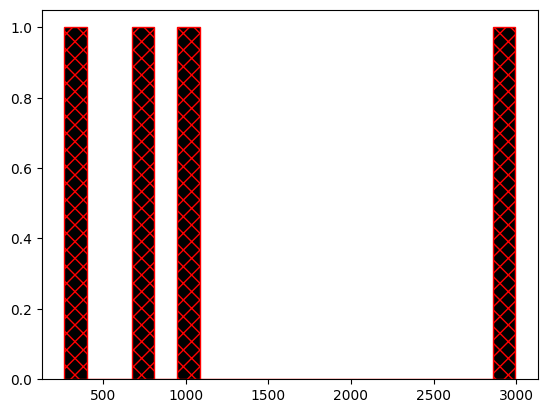

In [39]:
plt.hist(dataShipMode,bins=20,ec='k', color = 'k',hatch = 'xx', edgecolor='r')
plt.show()

## Exercise 5

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

In [45]:
sales = df.Sales
profit = df.Profit

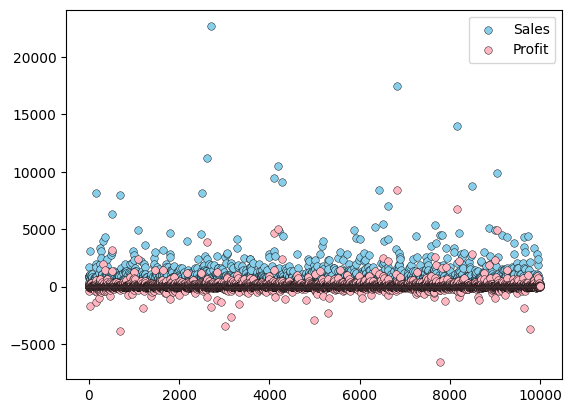

In [57]:
plt.scatter(x = sales.index,y=sales,marker = 'o',c = 'skyblue',s = 30,ec = 'k',lw = 0.3,label = 'Sales')
plt.scatter(x = profit.index,y=profit,marker = 'o',c = 'lightpink',s = 30,ec = 'k',lw = 0.3,label = 'Profit')
plt.legend(loc = 'best')
plt.show()